SEÑALES ELÉCTRICAS      
    
     Práctica de Ejercicios n°7,  Tema 2 y 3		     Miercoles 15 de Mayo 2024

**Objectivo**: Practicar numéricamente con la integral de convolución, su interpretación gráfica y su utilidad en los procesos de filtrado. Experimentar con algunos detalles no obvios del funcionamiento de la DTF.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.ndimage import shift
from scipy.fft import ifft, fft
from scipy.signal import freqs, iirfilter, square

from typing import Union, List, Tuple
from IPython.display import Audio

# Funciones Auxiliares

In [7]:
def obtener_pulso_rectangular(periodo: Union[float, int], vector_temporal: np.ndarray, ciclo_de_trabajo: float, es_centrado: bool = False) -> np.ndarray:
  """Obtener un pulso rectangular

  Parameters
  ----------
  periodo: Union[float, int]
    Periodo del pulso rectangular
  vector_temporal: np.ndarray
    Eje temporal del pulso rectangular
  ciclo_de_trabajo: float
    Ciclo de trabajo esperado
  es_centrado: Optional[bool] = False
    Indica si el pulso rectangular está centrado o no en el origen

  Returns
  -------
  np.ndarray
    Pulso rectangular deseado
  """
  voltaje_inferior = 0

  senial = square((2*np.pi*1/periodo)*vector_temporal, duty=ciclo_de_trabajo)
  senial[senial < 0] = voltaje_inferior

  if es_centrado:
    senial = shift(senial, senial.size*(1-ciclo_de_trabajo)/2, cval=voltaje_inferior)

  return senial

In [8]:
def obtener_funcion_deseada(pares_ordenados: List[Tuple[int, int]], cantidad_puntos_por_ciclo: int) -> Tuple[np.ndarray, np.ndarray, int]:
    """Obtener una función deseada a partes de un conjunto de pares ordenados

    Parameters
    ----------
    pares_ordenados : List[Tuple[int, int]]
        Pares ordenados que se desean satisfacer en la función deseada
    cantidad_puntos_por_ciclo : int
        Cantidad de muestras totales que se desea de la función

    Returns
    -------
    Tuple[np.ndarray, np.ndarray]
        Tupla con primer elemento con valores del eje de abscisa y segundo elemento con valores del eje de ordenadas
    """
    x_max = np.max([x for x, y in pares_ordenados])
    x_min = np.min([x for x, y in pares_ordenados])

    vector_y = [y for x, y in pares_ordenados]

    senial_en_x = np.linspace(start=x_min, stop=x_max, num=cantidad_puntos_por_ciclo)

    senial_en_y = []

    for index in range(len(pares_ordenados)):
      if index == 0:
        senial_en_y.append(pares_ordenados[index][1])
      elif index == len(pares_ordenados) - 1:
        continue

      pendiente = (pares_ordenados[index + 1][1] - pares_ordenados[index][1]) / (pares_ordenados[index + 1][0] - pares_ordenados[index][0])

      for muestra_temporal in senial_en_x:
        if pares_ordenados[index][0] <= muestra_temporal and muestra_temporal < pares_ordenados[index + 1][0]:
          senial_en_y.append(senial_en_y[-1] + pendiente * (x_max - x_min)/vector_muestras_temporal.size)

    return np.array(senial_en_y)

# Ejercicio 1

Use el archivo .ipynb compartido por la cátedra para visualizar el producto de convolución de un pulso rectangular y una señal con forma de "aleta de tiburón".

In [9]:
# Definición de variables

periodo = 2  # segundos
frecuencia_muestreo = 1e3
total_samples = int(periodo * frecuencia_muestreo)

In [10]:
# Generación de vector con muestras temporales

vector_muestras_temporal = np.array([*range(total_samples)]) * 1/frecuencia_muestreo

In [11]:
# Generación de Puslo rectangular

pulso_rectangular = obtener_pulso_rectangular(  # Usar la función dada como Función Auxiliar
    periodo=periodo,
    vector_temporal=vector_muestras_temporal,
    ciclo_de_trabajo=0.5,
    es_centrado=False
)

In [12]:
# Generación de Aleta de Tiburón

pares_ordenados = [
  (0, 0),
  (5, 1),
  (5.0001, 0)
]

aleta_tiburon = obtener_funcion_deseada(
    pares_ordenados=pares_ordenados,
    cantidad_puntos_por_ciclo=vector_muestras_temporal.size
)

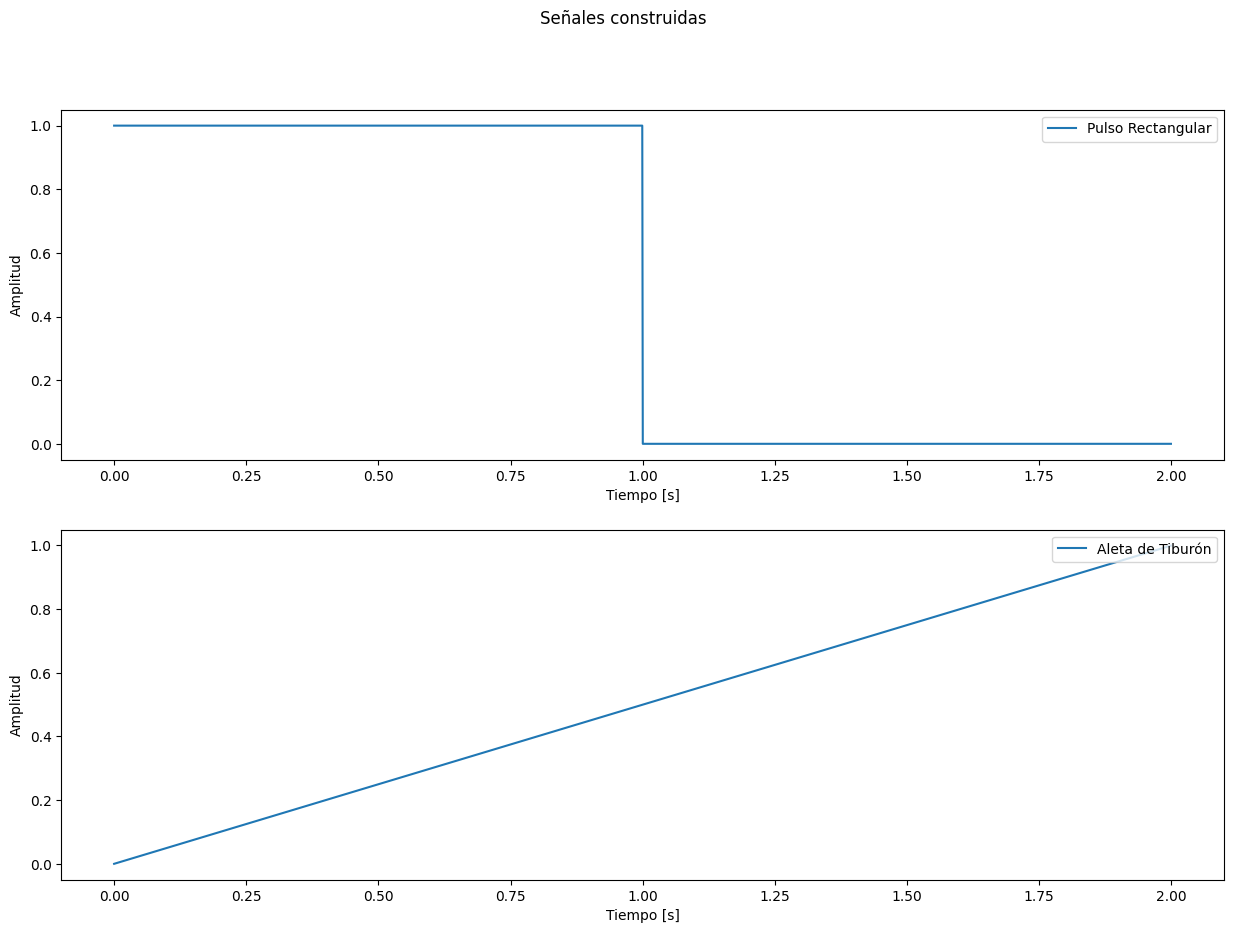

In [13]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(15, 10)

fig.suptitle("Señales construidas")

ax1.plot(vector_muestras_temporal, pulso_rectangular, label="Pulso Rectangular")
ax1.legend(loc="upper right")
ax1.set_ylabel("Amplitud")
ax1.set_xlabel("Tiempo [s]")

ax2.plot(vector_muestras_temporal, aleta_tiburon, label="Aleta de Tiburón")
ax2.legend(loc="upper right")
ax2.set_ylabel("Amplitud")
ax2.set_xlabel("Tiempo [s]")

plt.show()

In [14]:
senial_1=aleta_tiburon
senial_2=pulso_rectangular
senial_2_invertida = np.flip(senial_2)
senial_1_completa = np.pad(senial_1, (senial_2.size, 0), 'constant')
senial_2_completa = np.pad(senial_2_invertida, (0, senial_1.size), 'constant')


In [15]:
ejex= np.arange(0, senial_1_completa.size, 1, dtype=int)
ejex2=np.arange(0, senial_1.size, 1, dtype=int)
ejex3=np.arange(0, senial_2_completa.size, 1, dtype=int)
ejex4=np.arange(0, senial_2.size, 1, dtype=int)

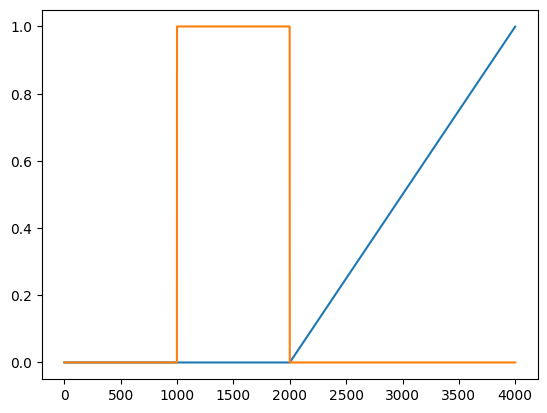

In [16]:
plt.plot(ejex, senial_1_completa)
plt.plot(ejex3, senial_2_completa)

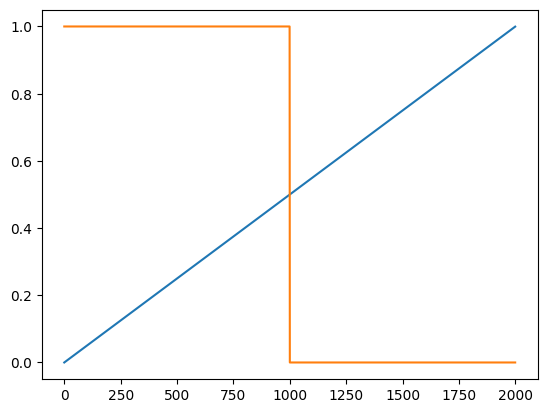

In [17]:
plt.plot(ejex2, senial_1)
plt.plot(ejex4, senial_2)

In [18]:
def obtener_convolucion(senial_1: np.ndarray, senial_2: np.ndarray, vector_temporal_senial_1: np.ndarray, vector_temporal_senial_2: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
  """
  Obtengo la convolución entre dos señales

  Parameters
  ----------
  senial_1: np.ndarray
    Señal 1 a convolucionar
  senial_2: np.ndarray
    Señal 2 a convolucionar
  vector_temporal_senial_1: np.ndarray
    Vector con muestras temporales de señal 1
  vector_temporal_senial_2: np.ndarray
    Vector con muestras temporales de señal 2

  Returns
  -------
  Tuple[np.ndarray, np.ndarray]
    Eje temporal de convolución y resultado de convolución de señales.
  """
  senial_2_invertida = np.flip(senial_2)  # senial[::-1]

  # np.pad(): https://numpy.org/doc/stable/reference/generated/numpy.pad.html
  senial_1_completa = np.pad(senial_1, (senial_2.size, 0), 'constant')
  senial_2_completa = np.pad(senial_2_invertida, (0, senial_1.size), 'constant')

  convolucion_vector = []
  for shift_amount in range(senial_1_completa.size):  # [0, 1,..., N + M - 1]
    senial_2_shift = shift(senial_2_completa, shift=shift_amount, cval=0)
    valor_producto_punto = np.dot(senial_1_completa, senial_2_shift)
    convolucion_vector.append(valor_producto_punto)

  # Para señales causales
  eje_temporal = np.linspace(
      start=0,
      stop=np.max(vector_temporal_senial_1) + np.max(vector_temporal_senial_2),
      num=len(convolucion_vector)
  )
  return eje_temporal, np.array(convolucion_vector)

499.7599949999959

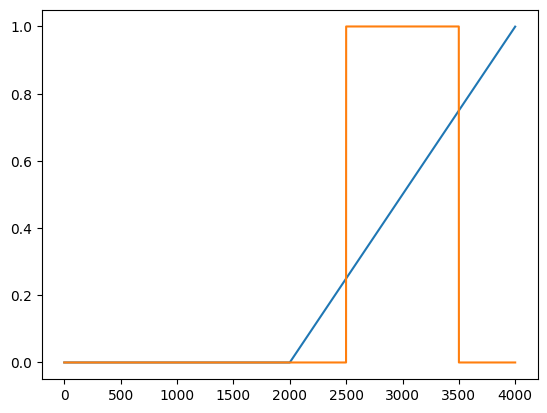

In [19]:
senial_2_invertida = np.flip(senial_2)
senial_1_completa = np.pad(senial_1, (senial_2.size, 0), 'constant')
senial_2_completa = np.pad(senial_2_invertida, (0, senial_1.size), 'constant')
convolucion_vector = []
shift_amount=1500
senial_2_shift = shift(senial_2_completa, shift=shift_amount, cval=0)
valor_producto_punto = np.dot(senial_1_completa, senial_2_shift)
convolucion_vector.append(valor_producto_punto)
plt.plot(senial_1_completa)
plt.plot(senial_2_shift)
valor_producto_punto

In [20]:
# Uso de función para obtener convolución

eje_temporal, convolucion_resultado = obtener_convolucion(
    senial_1=pulso_rectangular,
    senial_2=aleta_tiburon,
    vector_temporal_senial_1=vector_muestras_temporal,
    vector_temporal_senial_2=vector_muestras_temporal
)

In [21]:
max(vector_muestras_temporal)

1.999

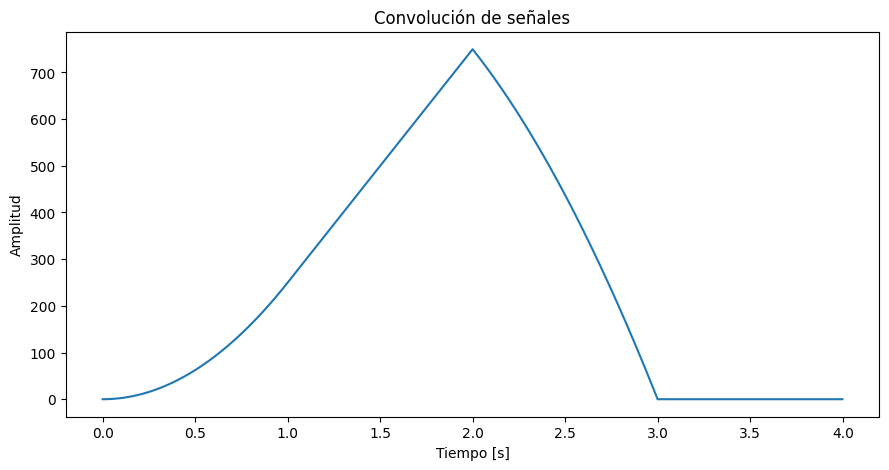

In [22]:
# Grafica de la convolución

fig = plt.gcf()
fig.set_size_inches(10.5, 5)

plt.title("Convolución de señales")
plt.plot(eje_temporal, convolucion_resultado)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.show()

Verifique la conmutatividad del proceso de convolución.

In [23]:
# Uso de función para obtener convolución con señales conmutada

eje_temporal_conmutado, convolucion_resultado_conmutada = obtener_convolucion(
    senial_1=aleta_tiburon,
    senial_2=pulso_rectangular,
    vector_temporal_senial_1=vector_muestras_temporal,
    vector_temporal_senial_2=vector_muestras_temporal
)

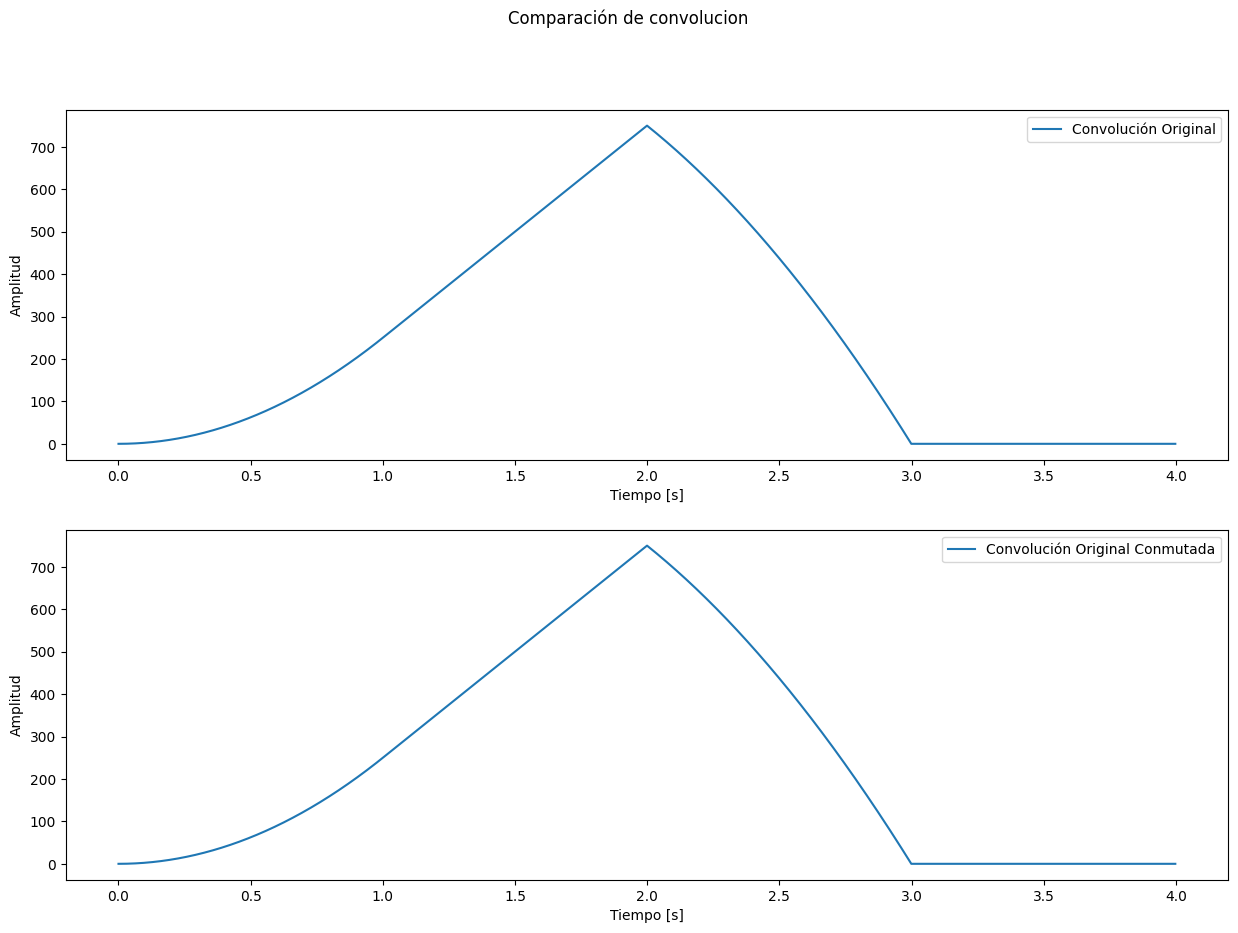

In [24]:
# Grafica comparativa de convolución conmutada

fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(15, 10)
fig.suptitle("Comparación de convolucion")

ax1.plot(eje_temporal, convolucion_resultado, label="Convolución Original")
ax1.legend(loc="upper right")
ax1.set_ylabel("Amplitud")
ax1.set_xlabel("Tiempo [s]")

ax2.plot(eje_temporal_conmutado, convolucion_resultado_conmutada, label="Convolución Original Conmutada")
ax2.legend(loc="upper right")
ax2.set_ylabel("Amplitud")
ax2.set_xlabel("Tiempo [s]")

plt.show()

Verifique que la operatoria para señales no-causales y para las causales es la misma.


In [25]:
# Armado de función no causal

pares_ordenados_no_causal = [
  (-3, 0),
  (-2, 1),
  (0, 1),
  (1, 2),
  (3, 2),
  (4, 0)
]

vector_temporal_no_causal = np.linspace(
    start=np.min([x for x, y in pares_ordenados_no_causal]),
    stop=np.max([x for x, y in pares_ordenados_no_causal]),
    num=vector_muestras_temporal.size
)

senial_no_causal = obtener_funcion_deseada(
    pares_ordenados=pares_ordenados_no_causal,
    cantidad_puntos_por_ciclo=vector_temporal_no_causal.size
)

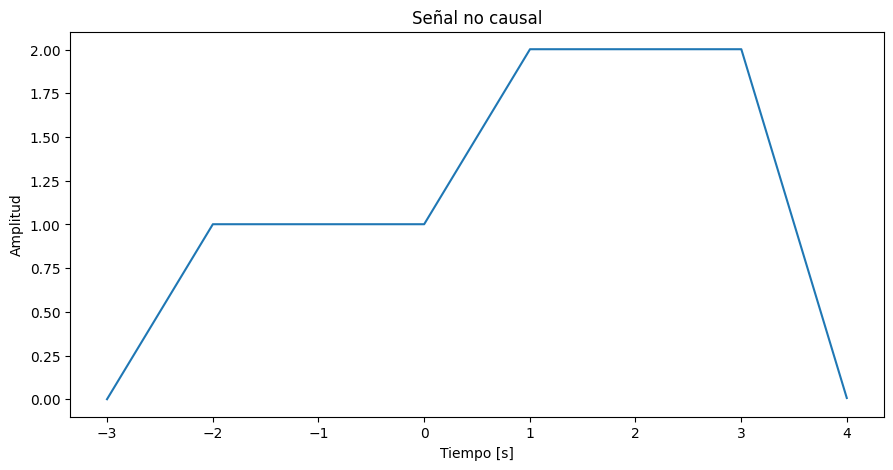

In [26]:
# Gráfica función no causal

fig = plt.gcf()
fig.set_size_inches(10.5, 5)

plt.title("Señal no causal")
plt.plot(vector_temporal_no_causal, senial_no_causal)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()

In [27]:
# Uso de función para obtener convolución con señales no causal

eje_temporal_no_causal, convolucion_resultado_no_causal = obtener_convolucion(
    senial_1=pulso_rectangular,
    senial_2=senial_no_causal,
    vector_temporal_senial_1=vector_muestras_temporal,
    vector_temporal_senial_2=vector_temporal_no_causal
)

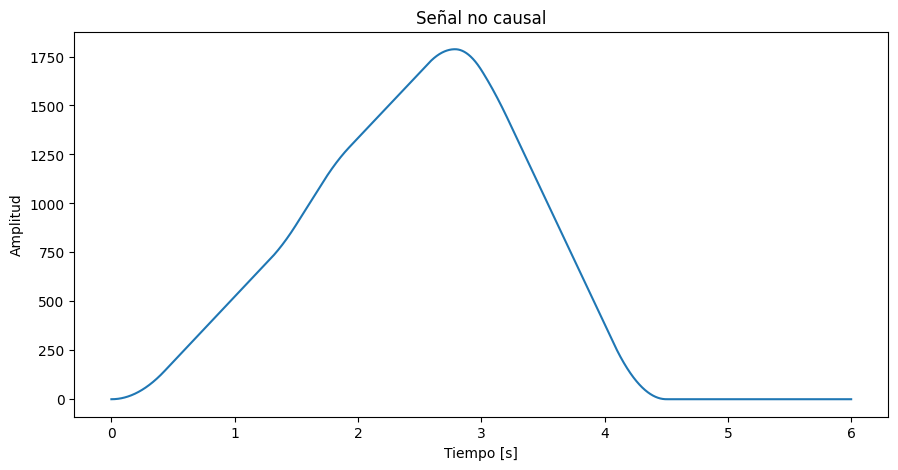

In [28]:
# Gráfica de resultado convolución con señal no causal

fig = plt.gcf()
fig.set_size_inches(10.5, 5)

plt.title("Señal no causal")
plt.plot(eje_temporal_no_causal, convolucion_resultado_no_causal)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()

Pruebe con otras señales también. Para construir las señales a convolucionar puede usar el método compartido por la cátedra llamado obtener_funcion_deseada().

...

# Ejercicio 2


¿Cómo modificaría el método obtener_convolucion() para colocar correctamente el eje del tiempo cuando alguna de las señales convolucionadas es no-causal?

In [29]:
senial_1=[1,2,3,4,5,6,7,8,9]

In [30]:
def obtener_convolucion_modificado(senial_1: np.ndarray, senial_2: np.ndarray, vector_temporal_senial_1: np.ndarray, vector_temporal_senial_2: np.ndarray) -> np.ndarray:
  senial_2_invertida = np.flip(senial_2)

  # np.pad(): https://numpy.org/doc/stable/reference/generated/numpy.pad.html
  senial_1_completa = np.pad(senial_1, (senial_2.size, 0), 'constant')
  senial_2_completa = np.pad(senial_2_invertida, (0, senial_1.size), 'constant')

  convolucion_vector = []
  for shift_amount in range(senial_1_completa.size):
    senial_2_shift = shift(senial_2_completa, shift=shift_amount, cval=0)
    valor_producto_punto = np.dot(senial_1_completa, senial_2_shift)
    convolucion_vector.append(valor_producto_punto)

  # Una senial no causal
  min_x = np.min(  # min_1 + min_2
    (
        np.min(vector_temporal_senial_1),
        np.min(vector_temporal_senial_2)
    )
  )
  rango_x_senial_1 = np.abs(np.ptp(vector_temporal_senial_1))  # | x_max1 - x_min1 |
  rango_x_senial_2 = np.abs(np.ptp(vector_temporal_senial_2))  # | x_max2 - x_min2 |
  max_x = min_x + rango_x_senial_1 + rango_x_senial_2

  eje_temporal = np.linspace(
      start=min_x,
      stop=max_x,
      num=len(convolucion_vector)
  )
  return eje_temporal, np.array(convolucion_vector)

In [31]:
# Uso de función para obtener convolución con señales no causal

eje_temporal_no_causal_mod, convolucion_resultado_no_causal_mod = obtener_convolucion_modificado(
    senial_1=pulso_rectangular,
    senial_2=senial_no_causal,
    vector_temporal_senial_1=vector_muestras_temporal,
    vector_temporal_senial_2=vector_temporal_no_causal
)

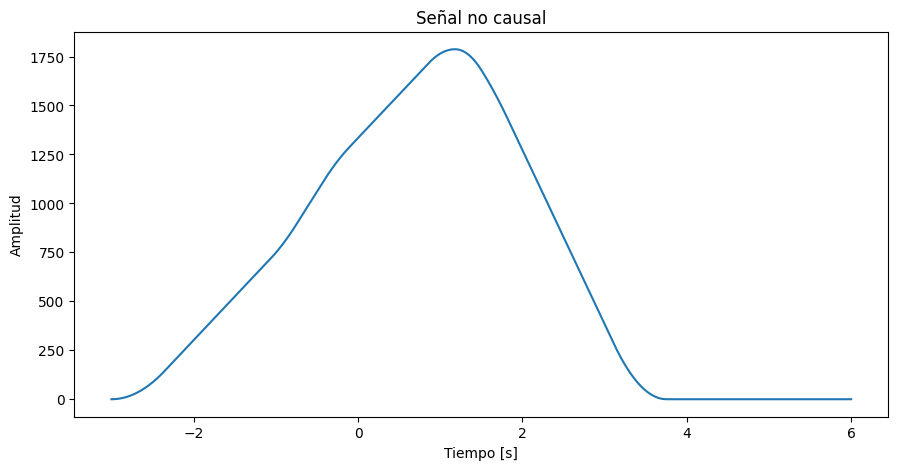

In [32]:
# Gráfica de resultado convolución con señal no causal con método modificado

fig = plt.gcf()
fig.set_size_inches(10.5, 5)

plt.title("Señal no causal")
plt.plot(eje_temporal_no_causal_mod, convolucion_resultado_no_causal_mod)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()

# Ejercicio 3

a) Construya los vectores de tiempo y amplitud correspondientes a una señal senoidal de 1kHz de 200ms de duración y, una frecuencia de muestreo de 8192Hz. Use la función "sound" del Octave Matlab para escuchar la señal.

In [33]:
# Defino variables de interés

frecuencia_muestreo = 8192  # Hz
duracion_senial = 0.2  # segundos = 200 [ms]
frecuencia = 1000  # Hz

In [34]:
# Generación de señal pedida

vector_tiempo_3 = np.arange(start=0, stop=duracion_senial+1/frecuencia_muestreo, step=1/frecuencia_muestreo)
senial_3 = np.sin(2*np.pi*frecuencia*vector_tiempo_3)

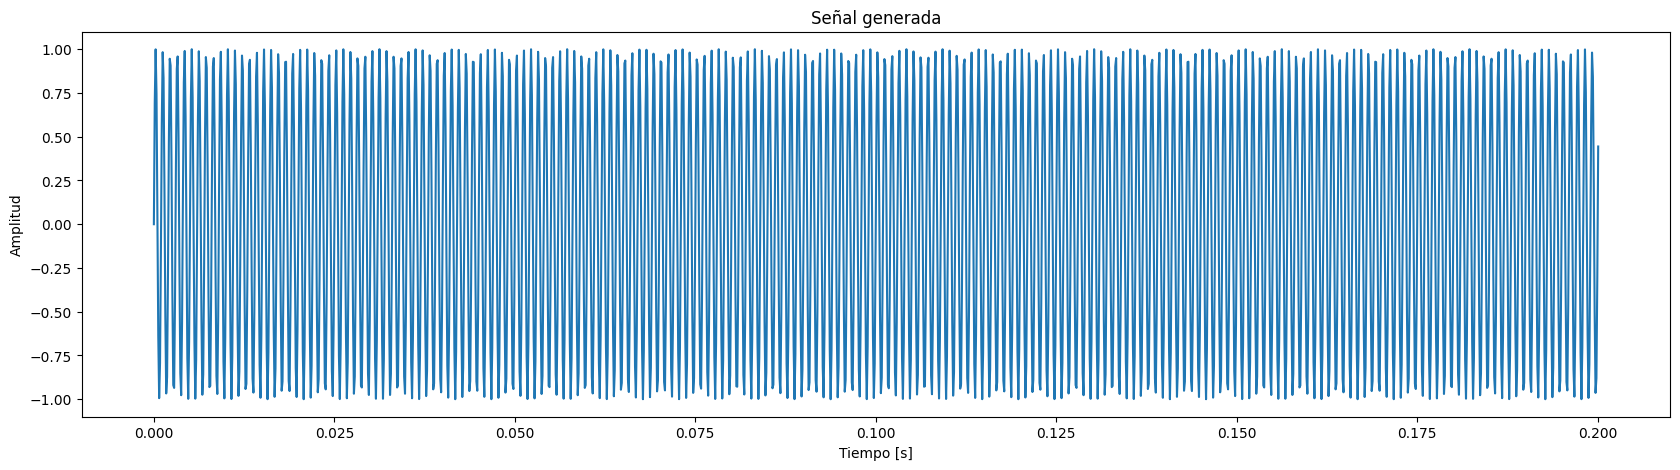

In [35]:
# Grafica señal generada

fig = plt.gcf()
fig.set_size_inches(20.5, 5)

plt.title("Señal generada")

plt.plot(vector_tiempo_3, senial_3)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.show()

In [36]:
# Reproducción señal generada

Audio(senial_3, rate=frecuencia_muestreo)

b) Genere un vector de 30 mil elementos con la función "randn". En la zona media del vector súmele una onda senoidal de 1kHz y 200ms de duración, que tenga la misma potencia media que el ruido. Escuche el resultado de la mezcla.

In [37]:
cantidad_elementos = 30000

senial_ruidosa = np.random.randn(cantidad_elementos)

In [38]:
# Calculo potencia del ruido generado
valor_medio_ruido = np.mean(senial_ruidosa)
valor_eficaz_ac_ruido = np.std(senial_ruidosa)
valor_eficaz_ruido = np.sqrt(valor_eficaz_ac_ruido**2 + valor_medio_ruido**2)
print(f"El valor eficaz estadístico de la señal ruidosa: {valor_eficaz_ruido}")

El valor eficaz estadístico de la señal ruidosa: 0.9966882427204333


Para una señal senoidal, se sabe que

$V_{ef} = \frac{A}{\sqrt{2}} $

Por lo que si queremos respetar un Valor Eficaz, debemos definir la amplitud de esta señal como:

$ A = V_{ef} * \sqrt{2} $

In [39]:
# Hago que el valor eficaz de la señal senoida sea igual a la del ruido

amplitud_senial_3_modificada = valor_eficaz_ruido * np.sqrt(2)
senial_3_modificada = senial_3 * amplitud_senial_3_modificada


valor_medio_senial_modificada = np.mean(senial_3_modificada)
valor_eficaz_ac_senial_modificada = np.std(senial_3_modificada)
valor_eficaz_senial_modificada = np.sqrt(valor_eficaz_ac_senial_modificada**2 + valor_medio_senial_modificada**2)
print(f"El valor eficaz estadístico de la señal senoidal modificada: {valor_eficaz_senial_modificada}")

El valor eficaz estadístico de la señal senoidal modificada: 0.9963187918613804


In [40]:
# Armado de señal para ser sumada

diferencia_muestras_seniales = senial_ruidosa.size - senial_3_modificada.size

senial_3_modificada_pad = np.pad(
    senial_3_modificada,
    (
      diferencia_muestras_seniales // 2,
      diferencia_muestras_seniales // 2
    ),
    'constant'
)

In [41]:
# Armado de señal compuesta y reproducción

senial_compuesta = senial_ruidosa + senial_3_modificada_pad

Audio(senial_compuesta, rate=frecuencia_muestreo)

c) Repita el procedimiento anterior reduciendo paulatinamente la intensidad de la senoidal hasta 14dB por debajo del nivel de ruido. ¿Cuánto vale la relación señal/ruido?

Necesito lograr que el valor_eficaz de mi señal sea 14 dB menor que la señal de interés.

Es decir que, necesito satisfacer la siguiente igualdad:

$ diferencia\_db\ [db] = 10 log(\frac{P_{ruido}}{P_{audio}}) $

De esta manera, la potencia de ruido vendrá dada por la siguiente ecuación:

$ P_{ruido} = 10^{\frac{diferencia\_db}{10}} P_{audio} $

In [42]:
# Cálculo de valor eficaz necesario en señal senoidal

diferencia_potencia = -14  # dB

valor_eficaz_necesario = valor_eficaz_ruido * 10**(diferencia_potencia/10)

print(f"El valor eficaz necesario es: {valor_eficaz_necesario}")

El valor eficaz necesario es: 0.03967887362333691


In [43]:
# Cálculo de señal atenuada

amplitud_senial_3_atenuada = valor_eficaz_necesario * np.sqrt(2)
senial_3_atenuada = senial_3 * amplitud_senial_3_atenuada


valor_medio_senial_atenuada = np.mean(senial_3_atenuada)
valor_eficaz_ac_senial_atenuada = np.std(senial_3_atenuada)
valor_eficaz_senial_atenuada = np.sqrt(valor_eficaz_ac_senial_atenuada**2 + valor_medio_senial_atenuada**2)
print(f"El valor eficaz estadístico de la señal senoidal modificada: {valor_eficaz_senial_atenuada}")

El valor eficaz estadístico de la señal senoidal modificada: 0.039664165519721295


In [44]:
# Armado de señal para ser sumada

diferencia_muestras_seniales_atenuada = senial_ruidosa.size - senial_3_atenuada.size

senial_3_atenuada_pad = np.pad(
    senial_3_atenuada,
    (
      diferencia_muestras_seniales_atenuada // 2,
      diferencia_muestras_seniales_atenuada // 2
    ),
    'constant'
)

In [45]:
# Armado de señal compuesta y reproducción

senial_atenuada_compuesta = senial_ruidosa + senial_3_atenuada_pad

Audio(senial_atenuada_compuesta, rate=frecuencia_muestreo)

Cálculo de Relación Señal-Ruido

Para el cálculo de la Relación Señal-Ruido se  debe considerar la siguiente expresión:

$SNR = \frac{Potencia senial}{Potencia ruido}$

Si evaluamos esta señal en dB, tenemos lo siguiente:

$SNR[dB] = 10 log_{10}(Potencia\ senial) - 10 log_{10}(Potencia\ Ruido)$

Equivalente a:

$SNR[dB] = Potencia\ senial\ [dB] - Potencia\ Ruido\ [dB]$

En nuestro ejemplo,

$Potencia\ senial [dB] = Potencia\ Ruido\ [dB] - 14\ [dB]$

Por lo tanto,

$SNR[dB] = Potencia\ senial\ [dB] - Potencia\ Ruido\ [dB]$

$SNR[dB] = (Potencia\ Ruido\ [dB] - 14\ [dB]) -  Potencia\ Ruido\ [dB]$

$SNR[dB] = - 14\ [dB]$

d) Procese las señales compuestas del ítem anterior,

i) convolucionando con la respuesta de un filtro pasabanda centrado en 1kHz

In [46]:
# Filtro PasaBanda con fo=1kHz y AB=10Hz

respuesta_temporal_filtro = 62.8 * np.exp(-31.4 * vector_tiempo_3)*np.cos(2*np.pi*1000*vector_tiempo_3 + 0.6/57.3)

In [47]:
# Convolución Filtro y Señal compuesta

eje_temporal_filtro, convolución_filtro = obtener_convolucion(
    senial_1=respuesta_temporal_filtro,
    senial_2=senial_compuesta,
    vector_temporal_senial_1=vector_tiempo_3,
    vector_temporal_senial_2=vector_tiempo_3
)

In [48]:
# Reproducción señal filtrada

Audio(convolución_filtro, rate=frecuencia_muestreo)

ii) Encontrando la correlación cruzada entre la señal compuesta y una senoidal de 1kHz y 200ms de duración mediante el uso del método obtener_correlacion_cruzada()

In [49]:
def obtener_correlacion_cruzada(senial_1: np.ndarray, senial_2: np.ndarray, vector_temporal_senial_1: np.ndarray, vector_temporal_senial_2: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
  """
  Obtengo la correlación entre dos señales

  Parameters
  ----------
  senial_1: np.ndarray
    Señal 1 a convolucionar
  senial_2: np.ndarray
    Señal 2 a convolucionar
  vector_temporal_senial_1: np.ndarray
    Vector con muestras temporales de señal 1
  vector_temporal_senial_2: np.ndarray
    Vector con muestras temporales de señal 2

  Returns
  -------
  Tuple[np.ndarray, np.ndarray]
    Eje temporal de convolución y resultado de convolución de señales.
  """

  # np.pad(): https://numpy.org/doc/stable/reference/generated/numpy.pad.html
  senial_1_completa = np.pad(senial_1, (senial_2.size, 0), 'constant')
  senial_2_completa = np.pad(senial_2, (0, senial_1.size), 'constant')

  convolucion_vector = []
  for shift_amount in range(senial_1_completa.size):
    senial_2_shift = shift(senial_2_completa, shift=shift_amount, cval=0)
    convolucion = np.dot(senial_1_completa, senial_2_shift)
    convolucion_vector.append(convolucion)

  # Para señales causales
  eje_temporal = np.linspace(
      start=0,
      stop=np.max(vector_temporal_senial_1) + np.max(vector_temporal_senial_2),
      num=len(convolucion_vector)
  )
  return eje_temporal, np.array(convolucion_vector)

In [50]:
# Cálculo de correlación cruzada

vector_temporal_senial_compuesta = np.linspace(
    start=0,
    stop=1/frecuencia_muestreo * cantidad_elementos,
    num=cantidad_elementos
)

eje_temporal_correlacion_cruzada, correlacion_cruzada = obtener_correlacion_cruzada(
    senial_1=senial_compuesta,
    senial_2=senial_3,
    vector_temporal_senial_1=vector_temporal_senial_compuesta,
    vector_temporal_senial_2=vector_tiempo_3
)

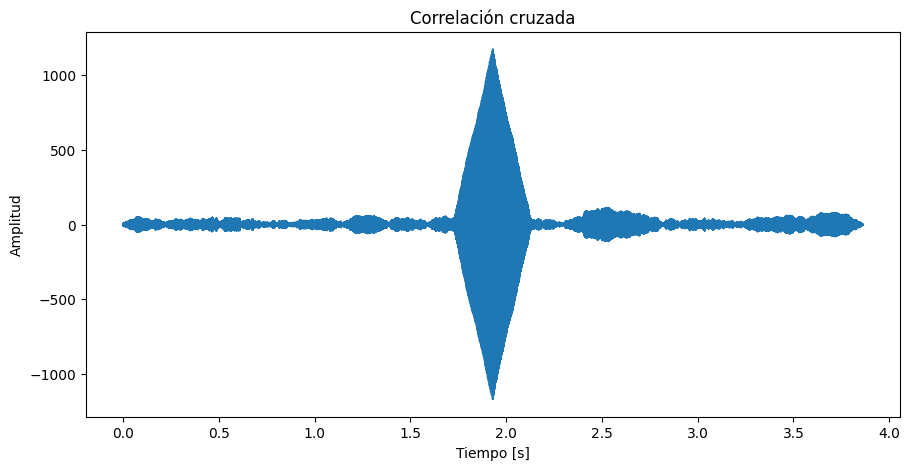

In [51]:
# Gráfico de correlación cruzada

fig = plt.gcf()
fig.set_size_inches(10.5, 5)

plt.title("Correlación cruzada")
plt.plot(eje_temporal_correlacion_cruzada, correlacion_cruzada)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.show()

Comente la utilidad de cada uno de los dos tipos de procesamiento.

( A realizar por el alumno )